In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
import string
from keras.models import Sequential
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import re
from textblob import Word
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Embedding,LSTM,Dropout
import keras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
true_df = pd.read_csv('/content/drive/My Drive/fakenewsdetection/True.csv')

In [5]:
fake_df = pd.read_csv('/content/drive/My Drive/fakenewsdetection/Fake.csv')

In [6]:
true_df['class'] = 1

In [7]:
fake_df['class'] = 0

In [8]:
true_df.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [9]:
df  = pd.concat([true_df, fake_df])

In [10]:
df

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [12]:
df.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:
df['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

<Axes: ylabel='class'>

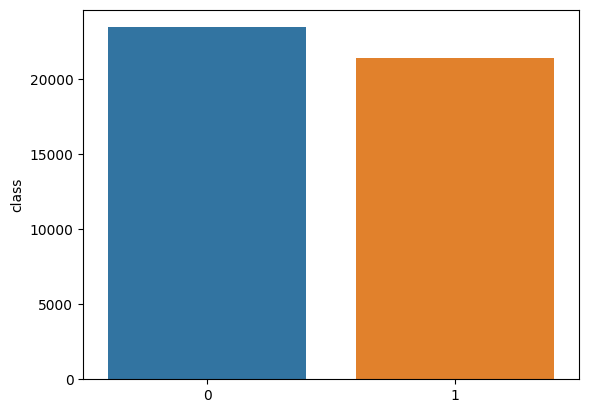

In [15]:
sns.barplot(x=df['class'].value_counts().index, y=df['class'].value_counts())


<function matplotlib.pyplot.show(close=None, block=None)>

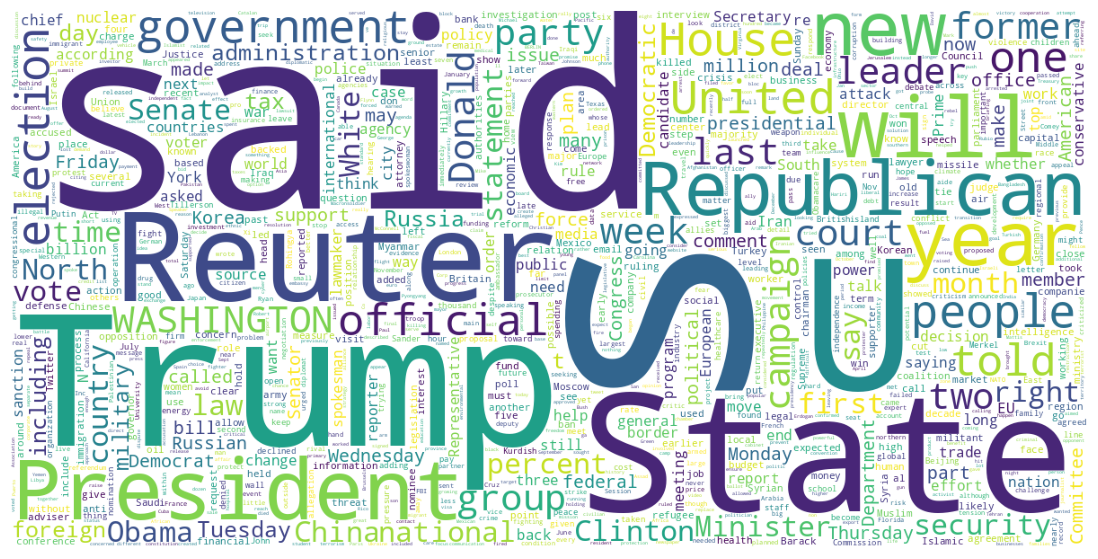

In [16]:
text_ = " ".join(i for i in true_df.text)
wc = WordCloud(background_color = "white", width = 1200, height = 600,
contour_width = 0, contour_color = "red", max_words = 1000,
scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text_)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

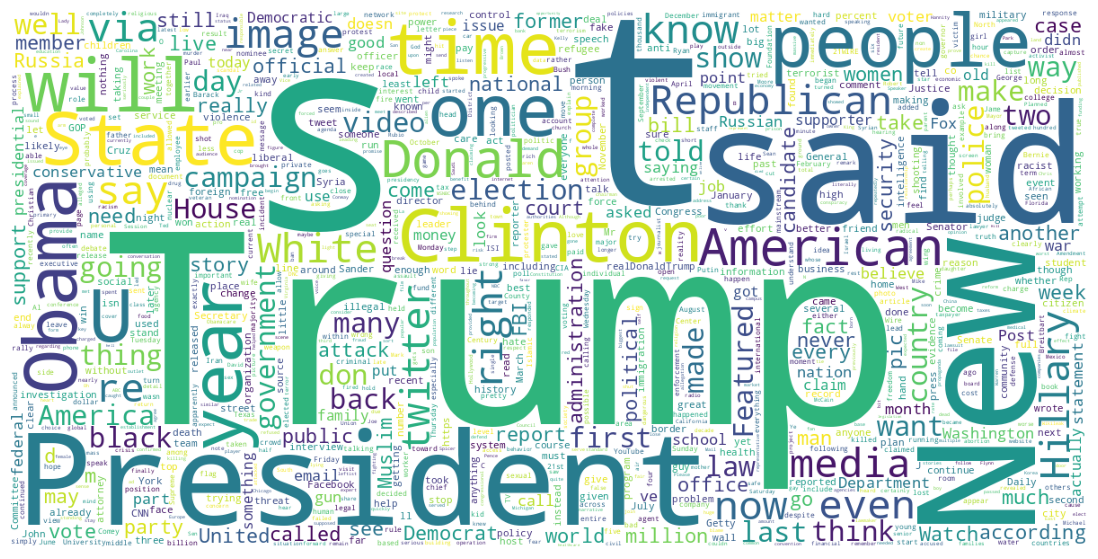

In [17]:
text = " ".join(i for i in fake_df.text)
wc = WordCloud(background_color = "white", width = 1200, height = 600,
contour_width = 0, contour_color = "red", max_words = 1000,
scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [18]:
df['text'] =df['text'] + ' ' + df['subject'] 

In [19]:
df = df.drop(columns= ['title',	'subject', 'date'])

In [20]:
df

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [21]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [22]:
df

,text,class
0,washington (reuters) - the head of a conservat...,1
1,washington (reuters) - transgender people will...,1
2,washington (reuters) - the special counsel inv...,1
3,washington (reuters) - trump campaign adviser ...,1
4,seattle/washington (reuters) - president donal...,1
...,...,...
23476,21st century wire says as 21wire reported earl...,0
23477,21st century wire says it s a familiar theme. ...,0
23478,patrick henningsen 21st century wireremember w...,0
23479,21st century wire says al jazeera america will...,0


In [23]:
df["text"] = df["text"].str.replace('\d','')


<ipython-input-23-297f1cebef03>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace('\d','')


In [24]:
df["text"] = df["text"].str.replace('[^\w\s]','')

<ipython-input-24-a4d5113bdc45>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace('[^\w\s]','')


In [25]:
df.values[1]

array(['washington reuters  transgender people will be allowed for the first time to enlist in the us military starting on monday as ordered by federal courts the pentagon said on friday after president donald trumps administration decided not to appeal rulings that blocked his transgender ban two federal appeals courts one in washington and one in virginia last week rejected the administrations request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on jan  a justice department official said the administration will not challenge those rulings the department of defense has announced that it will be releasing an independent study of these issues in the coming weeks so rather than litigate this interim appeal before that occurs the administration has decided to wait for dods study and will continue to defend the presidents lawful authority in district court in the meantime the official said speaking on condition of anonymity in s

In [26]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

In [27]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [28]:
df.values[1]

array(['washington reuters transgender people allowed first time enlist us military starting monday ordered federal courts pentagon said friday president donald trumps administration decided appeal rulings blocked transgender ban two federal appeals courts one washington one virginia last week rejected administrations request put hold orders lower court judges requiring military begin accepting transgender recruits jan justice department official said administration challenge rulings department defense announced releasing independent study issues coming weeks rather litigate interim appeal occurs administration decided wait dods study continue defend presidents lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior officials study implement directive trump prohibit transgender individuals serving defense department feb submit plan trump lawyers representing currentlyserving transgender service members aspiring re

In [29]:
df["text"] = df["text"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))


In [30]:
df["text"] = df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [31]:
df.head(n = 10).style.background_gradient(cmap = "summer")

,text,class
0,washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase nondefense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discretionary spending percent meadow chairman small influential house freedom caucus said program democrat saying thats enough need give government pay raise percent fiscal conservative dont see rationale eventually run people money said meadow among republican voted late december party debtfinanced tax overhaul expected balloon federal budget deficit add trillion year trillion national debt interesting hear mark talk fiscal responsibility democratic u representative joseph crowley said cbs crowley said republican tax bill would require united state borrow trillion paid future generation finance tax cut corporation rich one least fiscally responsible bill weve ever seen passed history house representative think going paying many many year come crowley said republican insist tax package biggest u tax overhaul year boost economy job growth house speaker paul ryan also supported tax bill recently went meadow making clear radio interview welfare entitlement reform party often call would top republican priority republican parlance entitlement program mean food stamp housing assistance medicare medicaid health insurance elderly poor disabled well program created washington assist needy democrat seized ryans early december remark saying showed republican would try pay tax overhaul seeking spending cut social program goal house republican may take back seat senate vote democrat needed approve budget prevent government shutdown democrat use leverage senate republican narrowly control defend discretionary nondefense program social spending tackling issue dreamer people brought illegally country child trump september put march expiration date deferred action childhood arrival daca program protects young immigrant deportation provides work permit president said recent twitter message want funding proposed mexican border wall immigration law change exchange agreeing help dreamer representative debbie dingell told cbs favor linking issue policy objective wall funding need daca clean said wednesday trump aide meet congressional leader discus issue followed weekend strategy session trump republican leader jan white house said trump also scheduled meet sunday florida republican governor rick scott want emergency aid house passed billion aid package hurricane florida texas puerto rico wildfire california package far exceeded billion requested trump administration senate yet voted aid politicsnews,1
1,washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling blocked transgender ban two federal appeal court one washington one virginia last week rejected administration request put hold order lower court judge requiring military begin accepting transgender recruit jan justice department official said administration challenge ruling department defense announced releasing independent study issue coming week rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official sai

<function matplotlib.pyplot.show(close=None, block=None)>

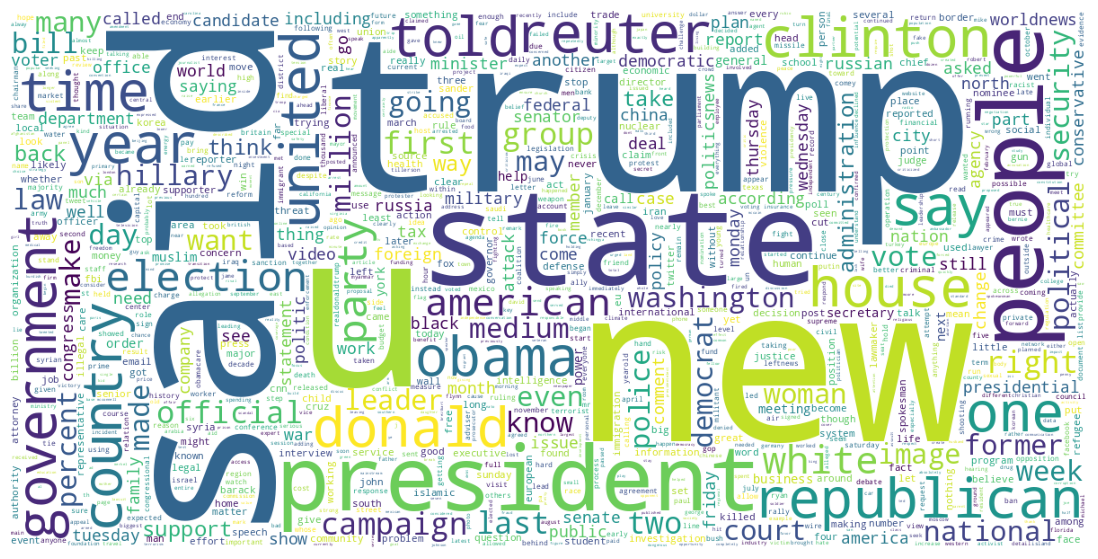

In [32]:
text_ = ' '.join(i for i in df.text)
wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text_)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df['class'], random_state = 0)

In [34]:
x_train  

13637    united nation reuters united state japan reque...
21004    fascinating even fact related flint water cris...
16499    pathetic predictably impotent united divided s...
3321     washington reuters aide u president donald tru...
2345     reuters former fbi director james comey fired ...
                               ...                        
8986     paul krugman admission drooling release irs ta...
21243    guatemala city reuters guatemala top court tue...
21196    plan electricity rate would necessarily skyroc...
22150    st century wire say washington russian witch h...
2732     winnipeg manitoba reuters former u president j...
Name: text, Length: 33673, dtype: object

In [35]:
max_feature = 300

In [36]:
tokenizer = Tokenizer(num_words = 10000)


In [37]:
tokenizer.fit_on_texts(x_train)

In [38]:
tokenized_train = tokenizer.texts_to_sequences(x_train)

In [39]:
x_train = pad_sequences(tokenized_train, maxlen=max_feature)

In [40]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(tokenized_test, maxlen=max_feature)

In [41]:
EMBEDDING_FILE = '/content/drive/My Drive/fakenewsdetection/glove.twitter.27B.100d.txt'

In [42]:
embeddings_index = dict()
f = open(EMBEDDING_FILE)
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()


In [43]:
vocab_size = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [44]:
[embedding_matrix]

[array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.64024001,  0.77112001,  0.32822999, ..., -0.41058001,
          0.53272003, -0.01706   ],
        [-0.24645001,  0.45247999,  0.83719999, ..., -0.98967999,
         -0.25141001, -0.54979002],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.22713999, -0.58740997, -0.69998002, ..., -0.21623001,
         -0.65622002,  1.04489994],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])]

TRAIN **MODEL**

In [45]:
batch_size = 256
epochs = 10
embed_size = 100
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [46]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], input_length=max_feature, trainable=False))
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25, dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          17298500  
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17,467,269
Trainable params: 168,769
Non-trainable params: 17,298,500
_________________________________________________________________


In [48]:
training = model.fit(x_train, y_train, batch_size = batch_size, validation_data = (X_test, y_test), epochs = epochs, callbacks=[learning_rate_reduction]) 

Epoch 1/10
132/132 [==============================] - 324s 2s/step - loss: 0.1332 - accuracy: 0.9415 - val_loss: 0.0396 - val_accuracy: 0.9887 - lr: 0.0100
Epoch 2/10
132/132 [==============================] - 318s 2s/step - loss: 0.0317 - accuracy: 0.9893 - val_loss: 0.0425 - val_accuracy: 0.9846 - lr: 0.0100
Epoch 3/10
132/132 [==============================] - 317s 2s/step - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.0175 - val_accuracy: 0.9950 - lr: 0.0100
Epoch 4/10
132/132 [==============================] - 320s 2s/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0155 - val_accuracy: 0.9963 - lr: 0.0100
Epoch 5/10
132/132 [==============================] - 318s 2s/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0128 - val_accuracy: 0.9960 - lr: 0.0100
Epoch 6/10
132/132 [==============================] - 320s 2s/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0142 - val_accuracy: 0.9964 - lr: 0.0100
Epoch 7/10
132/132 [==============================] - 320s 2s/st

In [48]:

model.save_weights('model_weights.h5')
